In [1]:
from dv import AedatFile
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from Utilities import *

In [2]:
labels = pd.read_csv('./DvsGesture/user01_fluorescent_labels.csv')
with AedatFile('./DvsGestureAEDAT4/user01_fluorescent.aedat4') as f:
    # events will be a named numpy array
    events = np.hstack([packet for packet in f['events'].numpy()])

    # Access information of all events by type
    timestamps, x, y, polarities = events['timestamp'], events['x'], events['y'], events['polarity']

In [3]:
def listToTensor(timestamps, x, y, polarities,width,height,deltaT):
    timeSlices = np.ceil((timestamps[-1]-timestamps[0])/deltaT)
    npTensor = np.zeros((timeSlices.astype(int),height,width))
    tensorIndex = 0
    initialIndex = 0
    while (initialIndex < timestamps.shape[0]):
        finalIndex = initialIndex
        while ((finalIndex < timestamps.shape[0]) and (timestamps[finalIndex] < timestamps[initialIndex] + deltaT)):
            finalIndex = finalIndex + 1
        for i in range(initialIndex,finalIndex):
            if (polarities[i]==0):
                npTensor[tensorIndex,y[i],x[i]] = -1
            else:
                npTensor[tensorIndex,y[i],x[i]] = 1
        tensorIndex = tensorIndex+1
        initialIndex = finalIndex+1
    return npTensor

In [4]:
test = listToTensor(timestamps,x,y,polarities,128,128,10000)

In [5]:
imgs = (test[:,:,:]/2+0.5)*255

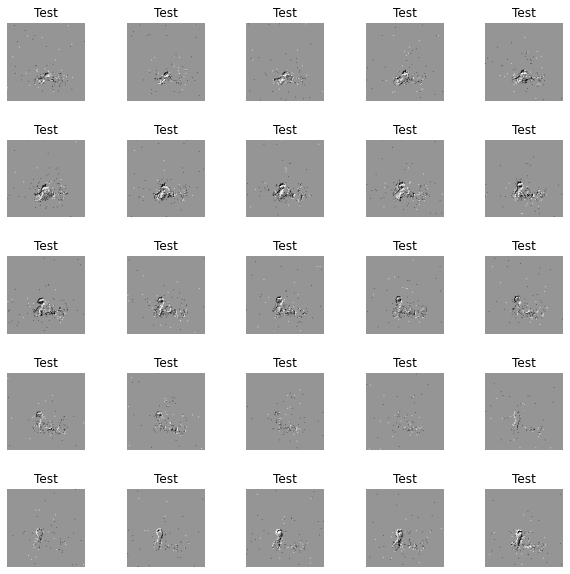

In [11]:
PlotImages(100,25,5,5,imgs,np.zeros((125)).astype(int),['Test'],color=False)

In [7]:
labels

,class,startTime_usec,endTime_usec
0,1,80048239,85092709
1,2,89431170,95231007
2,3,95938861,103200075
3,4,114845417,123499505
4,5,124344363,131742581
5,6,133660637,141880879
6,7,142360393,149138239
7,8,150717639,157362334
8,8,157773346,164029864
9,9,165057394,171518239


In [10]:
timestamps[-1]-timestamps[0]

114170024

In [9]:
187389051-80048239

107340812